In [21]:
import pandas as pd
import datetime
import math
import numpy as np
from sklearn import preprocessing, svm #scale, regresions, cross shuffle stats sepeareate data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
from matplotlib import style

In [4]:
import yfinance as yf

In [6]:
ticker = yf.Ticker('BTC-USD')
df = ticker.history(period="1y")

In [7]:
df['High_Low_per'] = (df['High'] - df['Close']) / df['Close']*100

In [8]:
df['Per_change'] = (df['Open'] - df['Open']) / df['Close']*100

In [9]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_Low_per,Per_change
Date,,,,,,,,,
2021-02-15,48696.535156,48875.570312,46347.476562,47945.058594,77069903166,0,0,1.940788,0.0
2021-02-16,47944.457031,50341.101562,47201.304688,49199.871094,77049582886,0,0,2.319580,0.0
2021-02-17,49207.277344,52533.914062,49072.378906,52149.007812,80820545404,0,0,0.738089,0.0
2021-02-18,52140.972656,52474.105469,51015.765625,51679.796875,52054723579,0,0,1.536981,0.0
2021-02-19,51675.980469,56113.652344,50937.277344,55888.132812,63495496918,0,0,0.403520,0.0
...,...,...,...,...,...,...,...,...,...
2022-02-11,43571.128906,43810.832031,42114.539062,42407.937500,26954925781,0,0,3.308094,0.0
2022-02-12,42412.300781,42992.550781,41852.574219,42244.468750,18152390304,0,0,1.770840,0.0
2022-02-13,42236.566406,42693.054688,41950.941406,42197.515625,14741589015,0,0,1.174332,0.0


In [11]:
df = df[['Close','High_Low_per','Per_change','Volume']]

In [12]:
label_col = 'Close'

In [13]:
forecast_ceil = int(math.ceil(0.001*len(df)))

In [14]:
forecast_ceil

1

In [15]:
df['label'] = df[label_col].shift(-forecast_ceil)

<ipython-input-15-faebf4879c7a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df[label_col].shift(-forecast_ceil)


In [16]:
df

,Close,High_Low_per,Per_change,Volume,label
Date,,,,,
2021-02-15,47945.058594,1.940788,0.0,77069903166,49199.871094
2021-02-16,49199.871094,2.319580,0.0,77049582886,52149.007812
2021-02-17,52149.007812,0.738089,0.0,80820545404,51679.796875
2021-02-18,51679.796875,1.536981,0.0,52054723579,55888.132812
2021-02-19,55888.132812,0.403520,0.0,63495496918,56099.519531
...,...,...,...,...,...
2022-02-11,42407.937500,3.308094,0.0,26954925781,42244.468750
2022-02-12,42244.468750,1.770840,0.0,18152390304,42197.515625
2022-02-13,42197.515625,1.174332,0.0,14741589015,42586.917969


In [17]:
#feaures X, labels Y
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forecast_ceil:]
X_lately = X[-forecast_ceil:] #no y value

In [40]:
X

array([[-6.11803267e-04, -2.85402560e-01,  0.00000000e+00,
         1.51284516e+00],
       [ 1.35933976e-01, -1.50268274e-01,  0.00000000e+00,
         1.51197376e+00],
       [ 4.56852176e-01, -7.14465153e-01,  0.00000000e+00,
         1.67368523e+00],
       ...,
       [-6.20936736e-01, -3.46031273e-01,  0.00000000e+00,
        -1.01373451e+00],
       [-6.26046066e-01, -5.58835459e-01,  0.00000000e+00,
        -1.16000106e+00],
       [-5.83672208e-01, -8.19571287e-01,  0.00000000e+00,
        -8.99004741e-01]])

In [18]:
df.dropna(inplace=True)

<ipython-input-18-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [19]:
#X = X[:-forecast_out+1]#all the points 
y = np.array(df['label'])

In [39]:
y

array([49199.87109375, 52149.0078125 , 51679.796875  , 55888.1328125 ,
       56099.51953125, 57539.9453125 , 54207.3203125 , 48824.42578125,
       49705.33203125, 47093.8515625 , 46339.76171875, 46188.453125  ,
       45137.76953125, 49631.2421875 , 48378.98828125, 50538.2421875 ,
       48561.16796875, 48927.3046875 , 48912.3828125 , 51206.69140625,
       52246.5234375 , 54824.1171875 , 56008.55078125, 57805.12109375,
       57332.08984375, 61243.0859375 , 59302.31640625, 55907.19921875,
       56804.90234375, 58870.89453125, 57858.921875  , 58346.65234375,
       58313.64453125, 57523.421875  , 54529.14453125, 54738.9453125 ,
       52774.265625  , 51704.16015625, 55137.3125    , 55973.51171875,
       55950.74609375, 57750.19921875, 58917.69140625, 58918.83203125,
       59095.80859375, 59384.3125    , 57603.890625  , 58758.5546875 ,
       59057.87890625, 58192.359375  , 56048.9375    , 58323.953125  ,
       58245.00390625, 59793.234375  , 60204.96484375, 59893.453125  ,
      

In [ ]:
train_window = 500
test_window = 100
train_splits = []
test_splits = []
for i in tqdm(range(train_window, len(BTC_df),test_window)):
    train_split = final_df[i-train_window:i]
    test_split = final_df[i:i+test_window]
    train_splits.append(train_split)
    test_splits.append(test_split)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle = None)

In [36]:
clf = svm.SVR(kernel='rbf')

In [37]:
clf.fit(X_train, y_train)

SVR()

In [38]:
accuracy = clf.score(X_test, y_test)

-0.0001710813382249654

In [27]:
print(accuracy)

-0.0001710813382249654


In [28]:
forecast_set = clf.predict(X_lately)

In [30]:
forecast_out = []

In [31]:
print(forecast_set, accuracy, forecast_out)

[47385.98093602] -0.0001710813382249654 []


In [32]:
df['Forecast'] = np.nan

<ipython-input-32-e44ce3a9a7b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


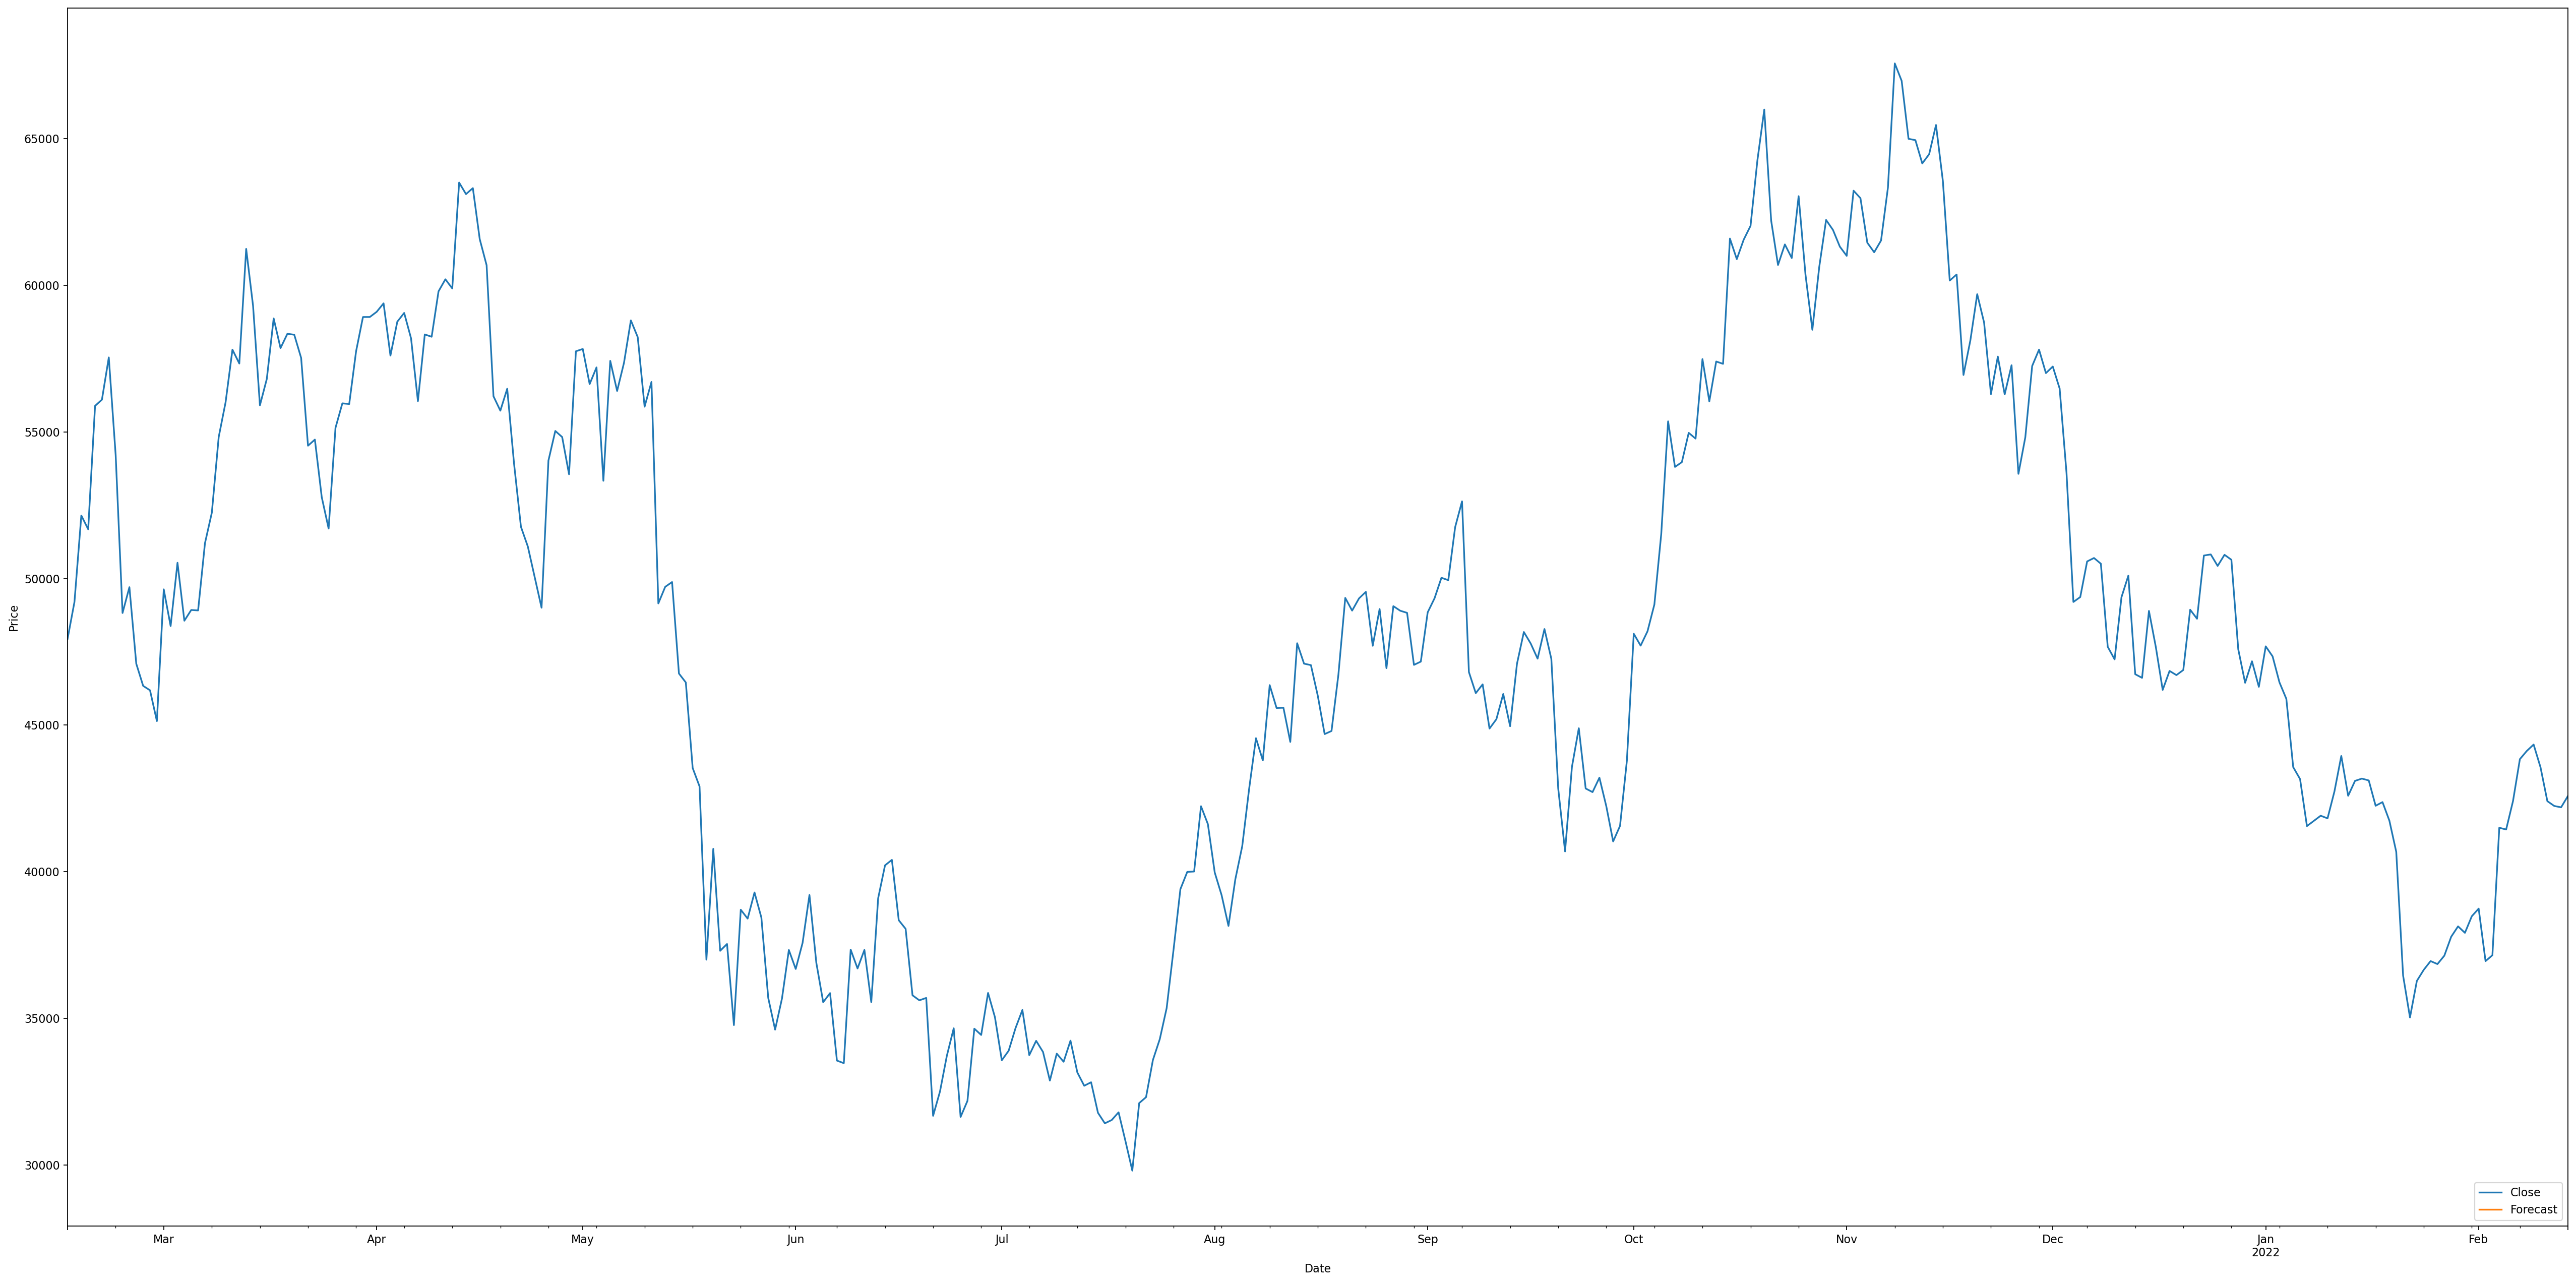

In [34]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(40, 20), dpi=160, facecolor='w', edgecolor='k')
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()